In [1]:
import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import VoigtComponent
from easydynamics.sample import DHOComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.resolution import ResolutionHandler

import matplotlib.pyplot as plt


from easydynamics.utils import detailed_balance_factor

from easyscience.variable import Parameter
%matplotlib widget

Text(0, 0.5, 'Detailed Balance Factor')

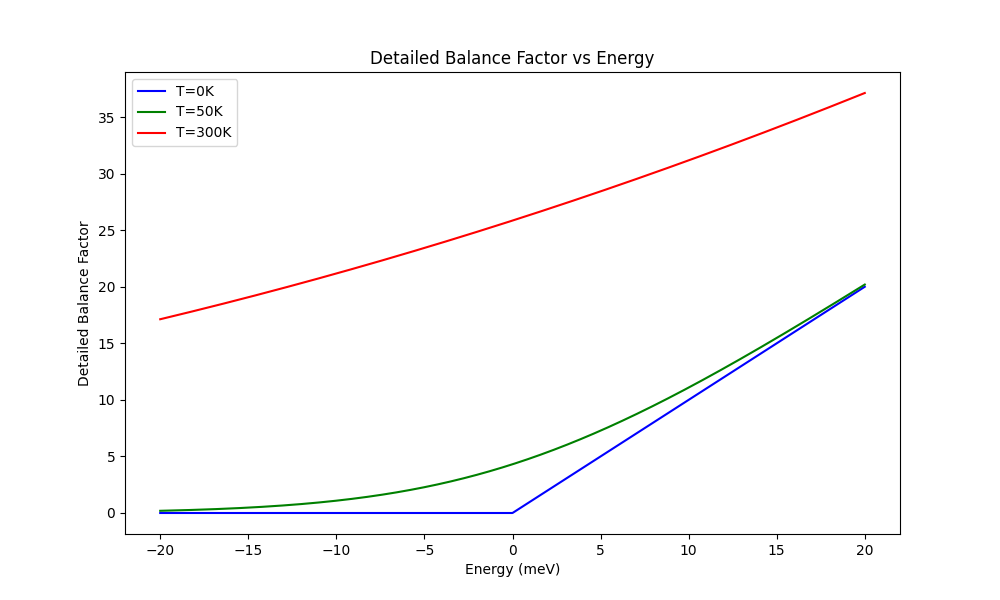

In [2]:
x=np.linspace(-20, 20, 1000)

T=0
DetailedBalanceT1=detailed_balance_factor(x,T)
plt.figure(figsize=(10, 6))
plt.plot(x, DetailedBalanceT1, label=f'T={T}K', color='blue')

T=50
DetailedBalanceT2=detailed_balance_factor(x,T)
plt.plot(x, DetailedBalanceT2, label=f'T={T}K', color='green')


T=300
DetailedBalanceT3=detailed_balance_factor(x,T)
plt.plot(x, DetailedBalanceT3, label=f'T={T}K', color='red')

plt.title('Detailed Balance Factor vs Energy')
plt.legend()

plt.xlabel('Energy (meV)')
plt.ylabel('Detailed Balance Factor')


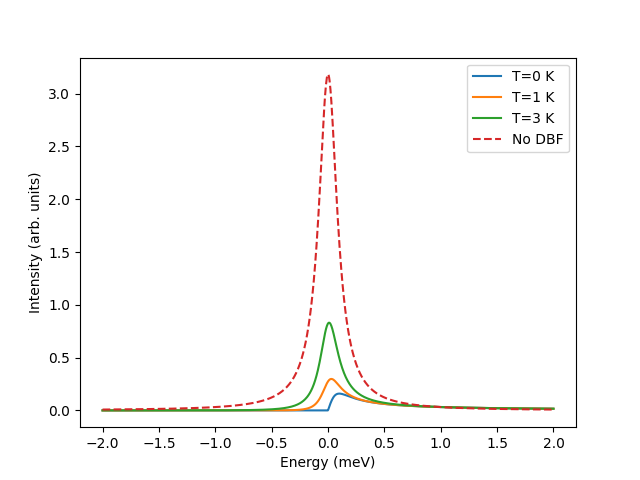

In [3]:
# Example of using the detailed balance factor in easydynamics

plt.figure()

x=np.linspace(-2, 2, 1000)
Lorentzian=LorentzianComponent(center=0, width=0.1, area=1)

DetailedBalanceT1=detailed_balance_factor(x,temperature=0.0)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT1, label='T=0 K')

DetailedBalanceT3=detailed_balance_factor(x,temperature=1)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT3, label='T=1 K')

DetailedBalanceT3=detailed_balance_factor(x,temperature=3)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT3, label='T=3 K')

plt.plot(x, Lorentzian.evaluate(x), label='No DBF', linestyle='--')

plt.legend()
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity (arb. units)')
plt.show()


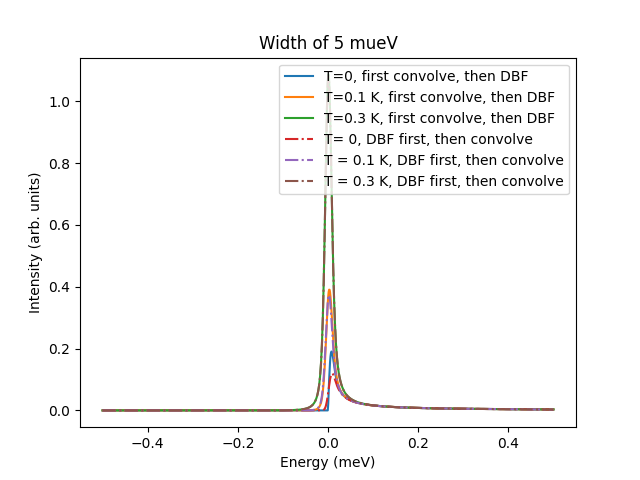

In [6]:


from scipy.signal import fftconvolve


# Example of DetailedBalance, up to 100 mueV. Res and peak is 5 mueV

x=np.linspace(-0.5, 0.5, 1000)

Gwidth=0.005  # 5 mueV
Lwidth=0.005  # 5 mueV
Lorentzian=LorentzianComponent(center=0, width=Lwidth, area=1)
Gaussian= GaussianComponent(center=0,width=Gwidth,area=1)
Voigt=VoigtComponent(center=0, Gwidth=Gwidth, Lwidth=Lwidth, area=1)

plt.figure()
DetailedBalanceT1=detailed_balance_factor(x,temperature=0.0)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT1, label='T=0, first convolve, then DBF')

DetailedBalanceT2=detailed_balance_factor(x,temperature=0.1)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT2, label='T=0.1 K, first convolve, then DBF')
    
DetailedBalanceT3=detailed_balance_factor(x,temperature=0.3)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT3, label='T=0.3 K, first convolve, then DBF')


# Evaluate both models at the same points
model1 = Lorentzian.evaluate(x)*DetailedBalanceT1
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='T= 0, DBF first, then convolve', linestyle='-.')


model1 = Lorentzian.evaluate(x)*DetailedBalanceT2
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='T = 0.1 K, DBF first, then convolve', linestyle='-.')

model1 = Lorentzian.evaluate(x)*DetailedBalanceT3
model2 = Gaussian.evaluate(x)       

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='T = 0.3 K, DBF first, then convolve', linestyle='-.')





plt.legend()
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity (arb. units)')
plt.title('Width of 5 mueV')
plt.show()


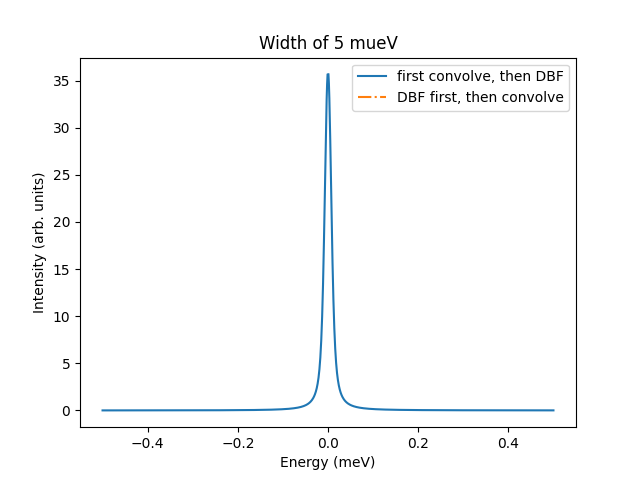

In [ ]:


from scipy.signal import fftconvolve


# Example of DetailedBalance, up to 100 mueV. Res and peak is 5 mueV

x=np.linspace(-0.5, 0.5, 1001)

Gwidth=0.005  
Lwidth=0.005  
Lorentzian=LorentzianComponent(center=0, width=Lwidth, area=1)
Gaussian= GaussianComponent(center=0,width=Gwidth,area=1)
Voigt=VoigtComponent(center=0, Gwidth=Gwidth, Lwidth=Lwidth, area=1)

plt.figure()
DetailedBalanceT1=detailed_balance_factor(x,temperature_K=10.0)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT1, label='first convolve, then DBF')


# Evaluate both models at the same points
model1 = Lorentzian.evaluate(x)*DetailedBalanceT1
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')



plt.legend()
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity (arb. units)')
plt.title('Width of 5 mueV')
plt.show()


In [ ]:
detailed_balance_factor(0,temperature_K=10.0)

array(nan)